# Problem Statement: Analysis of E-commerce Store's Revenue Performance

#### Objective: The primary objective of this analysis is to examine the monthly sales figures for 2019 to extract meaningful insights and trends. This will enable us to make informed strategic decisions and identify key areas for growth and improvement.

## Importing the Data

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Read the feather file into DataFrame
all_data = pd.read_feather(r'/content/drive/MyDrive/Job Projects /Sales_data.ftr')

In [ ]:
# Print the last 5 rows
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Cleaning Data

In [ ]:
all_data.shape

(186850, 6)

In [ ]:
# Check for the number of NULLs
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
# Remove any rows from the DataFrame `all_data` where all columns
# have missing values (NaN).
all_data = all_data.dropna(how='all')

In [ ]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
# Check for duplicate rows
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [ ]:
# Remove all the duplcate rows
all_data = all_data.drop_duplicates()

In [ ]:
all_data.shape

(185687, 6)

## Analyzing Monthly Sales

Which is the best month for sales?

In [ ]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [ ]:
#Create function to retrieve the month information from the data
def return_month(x):
  return x.split("/")[0]

In [ ]:
all_data['Month'] = all_data['Order Date'].apply(return_month)

In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [ ]:
# Using the unique function we check the unique values under this column
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [ ]:
# Filter out all instances where 'Order Date' is present
# This is not a valid entry
filter1 = all_data['Month'] == 'Order Date'

In [ ]:
# Keep the rows that do not meet the condition defined in "filter1".
# Or, keep the rows where "filter1" == False
all_data = all_data[-filter1]

In [ ]:
# Change the data types to int or float in order to do analysis
all_data['Month'] = all_data['Month'].astype(int)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)


In [ ]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [ ]:
# Calculate sales data
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

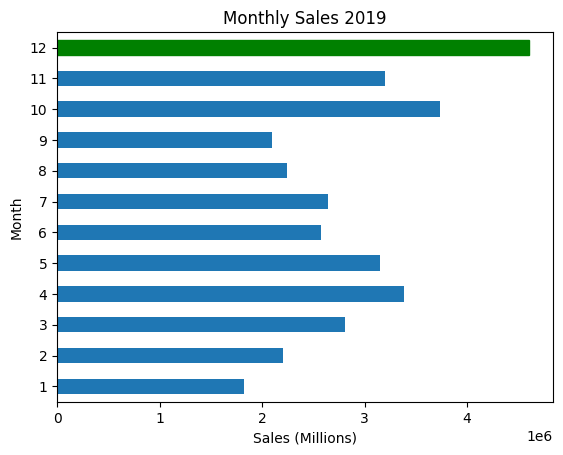

In [ ]:
# Grouping by Month and summing sales
monthly_sales = all_data.groupby('Month')['sales'].sum()

# Plotting
ax = monthly_sales.plot(kind='barh')

# Highlighting the maximum value in green
max_sales = monthly_sales.max()
for bar in ax.patches:
    if bar.get_width() == max_sales:
        bar.set_color('green')
plt.title('Monthly Sales 2019')
plt.xlabel('Sales (Millions)')
plt.show()

1. **Peak Sales Period:** December may be a peak period for sales. This might be attributed to holiday shopping or year-end promotions.
2. **Mid-Year Sales Activity:** The bar chart suggests a steady decline in sales volume beginning from mid-year. This trend could indicate that sales are seasonally influenced, possibly tapering off during the summer months. This observation may present an opportunity to examine and perhaps enhance the supply chain efficiency or introduce new products specifically tailored to the summer season.
3. **Initial Months' Performance:** The initial months show lower sales volumes during this period. This might reflect consumer spending habits post-holiday season or could indicate a potential area for strategic sales initiatives to bolster performance during these months.


## Analyzing the Orders by City

Which cities contribute to the bulk of the order shipments?

In [ ]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [ ]:
# Extract the city names from the 'Purchase Address' column
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

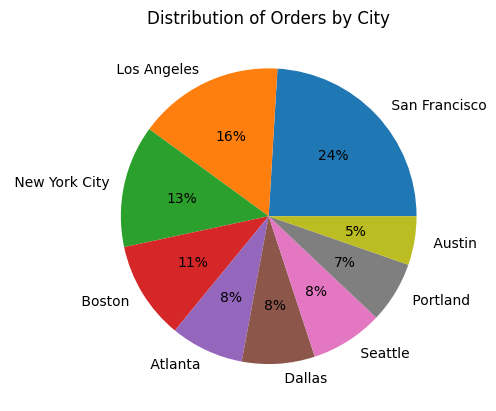

In [ ]:
# Create a frequency table for the city column
pd.value_counts(all_data['city']).plot(kind='pie', autopct= '%1.0f%%')
plt.ylabel('')
plt.title('Distribution of Orders by City');

1. **Market Presence in San Francisco:** With San Francisco accounting for 24% of the total orders, it could mean that the e-commerce store has a significant presence or a loyal customer base in this region. It may be beneficial to explore what might be contributing to this prominence, such as targeted marketing strategies or a particular product demand.
2. **Opportunities in Major Cities:** The sizeable percentages for Los Angeles and New York City, representing 16% and 13% of orders respectively, could suggest that these larger metropolitan areas have a strong customer engagement. These cities might offer potential for growth, perhaps through increased advertising efforts or by diversifying the product range to meet the specific needs of these demographics.
3. **Developing Markets:** The smaller shares for cities like Austin, Portland, and Seattle might imply that these are developing markets for the e-commerce store. These areas could present opportunities for market expansion. Tailored marketing campaigns or a strategic push to increase brand awareness might be ways to enhance market share in these locations.

## Analyzing Products

Which product sold the most and what can this tell us?

In [ ]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [ ]:
# Aggregating the data
count_df = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).sort_values('Quantity Ordered', ascending=False)


In [ ]:
count_df = count_df.reset_index()

In [ ]:
count_df.head(2)

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99


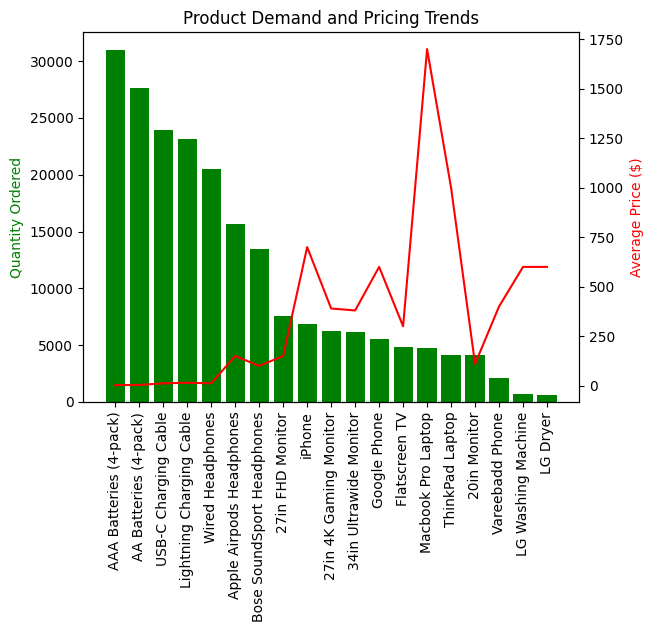

In [ ]:
# Creating the figure and the first set of axes
fig, ax1 = plt.subplots()

# Creating the second set of axes that shares the same x-axis
ax2 = ax1.twinx()

# Storing the product names for use as labels on the x-axis
products = count_df.index.values

ax1.bar(products, count_df['Quantity Ordered'], color='g')
ax2.plot(products, count_df['Price Each'], color='r')
ax1.set_xticklabels(products, rotation='vertical')

ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Average Price ($)', color='r')

plt.title('Product Demand and Pricing Trends')

plt.show()

1. **High Volume, Low Price Products:** Products like the 'AAA Batteries (4-pack)' and 'AA Batteries (4-pack)' are ordered in very high quantities, which could suggest that they are low-cost items that are frequently needed by customers. Their lower price points may drive higher volume sales.
2. **Premium Products with Lower Volume:** There is a product with a significantly higher average price, which corresponds to a premium product. The quantity ordered for this product is much lower compared to the high volume items, which is typical for higher-priced goods due to their higher cost and possibly more niche market.
3. **Price Variation Among Electronics:** The graph shows a variation in the average price among different electronic products. While some electronics such as monitors and laptops have a higher average price, others like headphones have a lower average price. This might indicate a range of product offerings that cater to different segments of the market, from more budget-conscious consumers to those seeking premium options.

## Understanding the trend of the most sold products.

In [ ]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [ ]:
most_sold_products = all_data['Product'].value_counts()[0:5].index

In [ ]:
most_sold_products_df = all_data[all_data['Product'].isin(most_sold_products)]

In [ ]:
most_sold_products_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [ ]:
# Grouping the 'most_sold_products_df' DataFrame by 'Month' and 'Product'
# and counting the number of occurrences (size) of each group.
most_sold_products_df.groupby(['Month', 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [ ]:
pivot = most_sold_products_df.groupby(['Month', 'Product']).size().unstack()

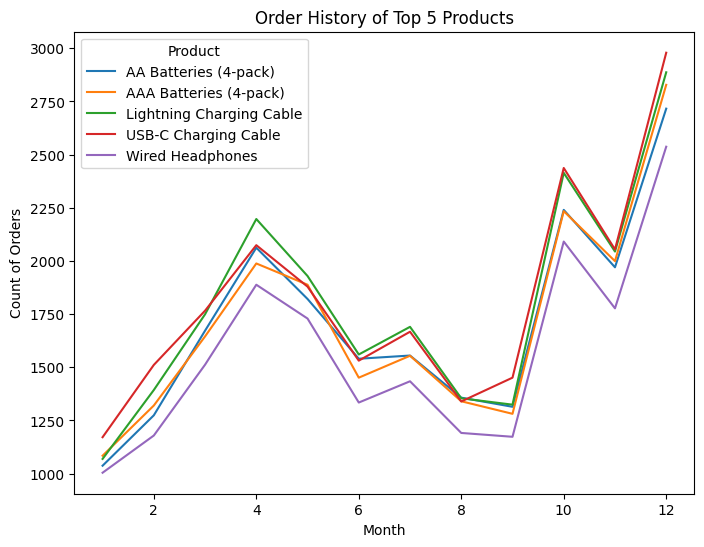

In [ ]:
pivot.plot(figsize=(8,6))
plt.ylabel('Count of Orders')
plt.title('Order History of Top 5 Products');

1. **End-of-Year Surge in Orders:** There is a noticeable spike in the number of orders for all top 5 products towards the end of the year, around months 10 to 12. This could be due to increased purchasing during the holiday season.
2. **Mid-Year Dip in Orders:** There's a dip for all products around the middle of the year, roughly between months 4 and 9. This pattern might suggest a seasonal decline in sales, possibly as consumers shift their spending priorities during the summer months.
3. **Similar Sales Trajectories:** The sales trajectories for all five products appear to follow a similar pattern throughout the year. This suggests that there might be a common factor affecting the sales of these products, such as marketing campaigns, consumer purchasing behavior, or seasonal trends.

## What Products are often sold together?

In [ ]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [ ]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [ ]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [ ]:
# This line groups the 'df_duplicated' DataFrame by 'Order ID' and then concatenates the 'Product' names into a single string for each 'Order ID'.
# The lambda function takes all 'Product' entries for each 'Order ID' and joins them with a comma, resulting in a comma-separated list of products per order.

dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product': 'grouped_products'})

In [ ]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [ ]:
# Merging two DataFrames, 'df_duplicated' and 'dup_products', on the 'Order ID' column using a left join.
dup_products_df = df_duplicated.merge(dup_products, how='left', on='Order ID')

In [ ]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [ ]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

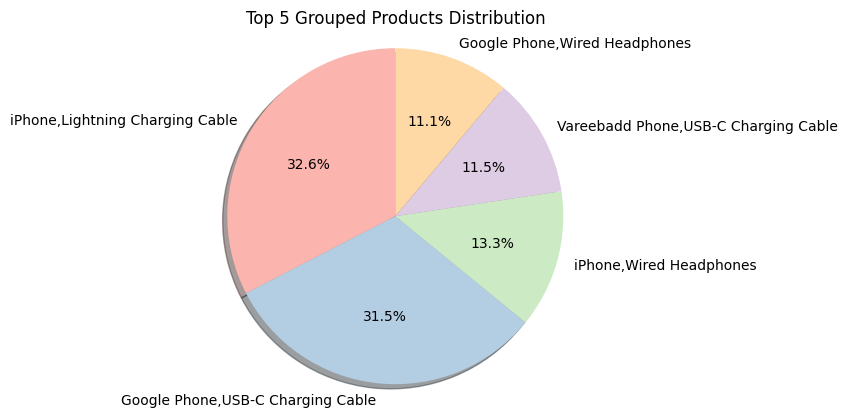

In [ ]:
# Plotting the pie chart with the top 5 grouped products and their percentages
pie_chart = no_dup_df['grouped_products'].value_counts()[0:5].plot.pie(
    autopct='%1.1f%%',  # Adding percentage to slices
    startangle=90,      # Starting slice angle
    colors=plt.cm.Pastel1.colors,  # Color palette for slices
    shadow=True         # Adding shadow for a 3D look
)

plt.ylabel('')  # Removing the y-label
plt.title('Top 5 Grouped Products Distribution')  # Adding a title for clarity
plt.axis('equal')  # Ensuring the pie chart is a circle

# Display the pie chart
plt.show()

1. **Popular Product Combinations:** The combination of 'iPhone' and 'Lightning Charging Cable' is one of the most frequently purchased, occupying a significant portion of the chart. This could imply that customers often prefer to get accessories at the same time as a new phone purchase.
2. **Cross-Brand Accessory Demand:** There is a notable share for 'Google Phone' and 'USB-C Charging Cable' as well as 'Vareebadd Phone' and 'USB-C Charging Cable'. This suggests that there is a demand for charging cables across different phone brands, which might indicate a good cross-selling opportunity for these types of accessories.
3. **Headphone Pairings:** The pairing of smartphones with wired headphones appears to be common, as seen with both 'iPhone, Wired Headphones' and 'Google Phone, Wired Headphones' groupings. This could highlight a trend in customers purchasing headphones alongside new phones.